# Data Duplication
#### Using Kaggle data duplication challenge
## Description: Code for data duplication 
### References: www.kaggle.com
### Link: (https://www.kaggle.com/rtatman/data-cleaning-challenge-deduplication/)
#### Author: Sravani.G
#### Revision: 1
#### Date: 28 Aug 2019

## Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt         #this library is used to plot graphs from dataset

## Data for duplication

In [16]:
# read in Steam video game data &add column names 
video_games = pd.read_csv ("/Users/HP/Desktop/data science/Data_Duplication_Matplotlib.csv")           # read in data
print(list(video_games.columns.values))  #to dislpay column header
video_games = pd.read_csv ("/Users/HP/Desktop/data science/Data_Duplication_Matplotlib.csv", sep = ',', names=['user_id', 'game_title', 'behaviour_name', 'value', 'x'])
print(video_games.head())        
video_games = video_games.drop(['x'], axis=1)                    ##droping last column   
# video_games[:-1]           ##droping last columnn
print(video_games.tail()) 
vg = pd.DataFrame(video_games)                          #dataframing without the last column
print(list(vg.columns.values))    
vg = vg.drop(index=199996, columns='value')            #droping column with row number 
print(vg.tail())   

['151603712', 'The Elder Scrolls V Skyrim', 'purchase', '1.0', '0']
     user_id                  game_title behaviour_name  value  x
0  151603712  The Elder Scrolls V Skyrim       purchase    1.0  0
1  151603712  The Elder Scrolls V Skyrim           play  273.0  0
2  151603712                   Fallout 4       purchase    1.0  0
3  151603712                   Fallout 4           play   87.0  0
4  151603712                       Spore       purchase    1.0  0
          user_id                  game_title behaviour_name  value
199995  128470551                 Titan Souls           play    1.5
199996  128470551  Grand Theft Auto Vice City       purchase    1.0
199997  128470551  Grand Theft Auto Vice City           play    1.5
199998  128470551                        RUSH       purchase    1.0
199999  128470551                        RUSH           play    1.4
['user_id', 'game_title', 'behaviour_name', 'value']
          user_id                  game_title behaviour_name
199994  128470

In [17]:
vg.head()

,user_id,game_title,behaviour_name
0,151603712,The Elder Scrolls V Skyrim,purchase
1,151603712,The Elder Scrolls V Skyrim,play
2,151603712,Fallout 4,purchase
3,151603712,Fallout 4,play
4,151603712,Spore,purchase


## Visualizing Data of duplicated records

          user_id                    game_title behaviour_name  is_duplicate
199871  125424716                      Terraria       purchase         False
199896   99096740                        Dota 2       purchase         False
199948  176449171                        Dota 2       purchase         False
199960  221315846                        Dota 2       purchase         False
199968  128470551  The Binding of Isaac Rebirth       purchase         False
Number of duplicated rows in Dataframe: 12393


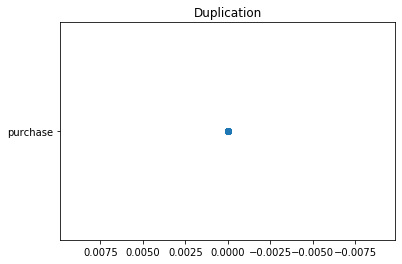

None


In [23]:
# visualizing  Data Duplication
# get the row numbers of duplicated rows
vg["is_duplicate"] = vg.duplicated()                                #getting the duplicated rows
print(vg.tail())                                                    #printing the duplicated rows
# vg.groupby(vg.columns.tolist(),as_index=False).size()            ##shows the row duplicated count
# vg.duplicated(subset='one', keep='first').sum()
noOfRows = vg.duplicated().shape[0]                                 # counting no of duplicated rows
print('Number of duplicated rows in Dataframe:', noOfRows)          #displaying no of duplicated rows

#inside the data is relocated
x = filter(vg.duplicated() == True, 'game_title')
print(x)
# plot duplicated rows as black lines
# add a title
plt.title("Duplication")
plt.scatter(vg.duplicated(), vg['behaviour_name'])
# print(plt.show())
plt.gca().invert_xaxis()
print(plt.show())

## Find and remove exact duplicates of data

In [21]:
# find and remove exact duplicates
# look at first few rows
print(vg.head())
# count no of duplicate rows in dataset
vg.groupby(vg.columns.tolist(),as_index=False).size()
# dups_user_id_and_game_title_and_behaviour_name = vg.pivot_table(index=['user_id','game_title','behaviour_name'], aggfunc='size')
# print(dups_user_id_and_game_title_and_behaviour_name)        # counting no of duplicated rows
# get only distinct rows in a dataset
# vg.drop_duplicates(keep='first')
# print(vg.drop_duplicates(keep='first'))

# how many rows we removed
bool_series = vg["user_id"].duplicated()                             # making a bool series
bool_series                                                          # bool series  
vg = vg[~bool_series]                                                # passing NOT of bool series to see unique values only  
vg.info()                                                            # displaying data 



     user_id                  game_title behaviour_name  is_duplicate
0  151603712  The Elder Scrolls V Skyrim       purchase         False
1  151603712  The Elder Scrolls V Skyrim           play         False
2  151603712                   Fallout 4       purchase         False
3  151603712                   Fallout 4           play         False
4  151603712                       Spore       purchase         False
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12393 entries, 0 to 199968
Data columns (total 4 columns):
user_id           12393 non-null int64
game_title        12393 non-null object
behaviour_name    12393 non-null object
is_duplicate      12393 non-null bool
dtypes: bool(1), int64(1), object(2)
memory usage: 399.4+ KB


## Removing partial duplicates of data

In [22]:
# find and remove partial duplicates

# look at just first 20 rows
print(vg.iloc[1:20, ])

# automatically remove duplicated values, including partials
vg.duplicated('user_id')

# see duplicate records
vg.drop_duplicates(['user_id'], keep='first')
vg

       user_id                                   game_title behaviour_name  \
66   187131847                                       Dota 2       purchase   
68    59945701                      Ultra Street Fighter IV       purchase   
133   53875128                           Grand Theft Auto V       purchase   
835  234941318                                       Strife       purchase   
836  140954425                              Team Fortress 2       purchase   
838   26122540  Call of Duty Modern Warfare 2 - Multiplayer       purchase   
855  176410694                                       Dota 2       purchase   
857  197278511                                       Dota 2       purchase   
859  150128162                              Team Fortress 2       purchase   
861  197455089                                       Dota 2       purchase   
863   63024728                             Empire Total War       purchase   
865  297811211                         ARK Survival Evolved     

,user_id,game_title,behaviour_name,is_duplicate
0,151603712,The Elder Scrolls V Skyrim,purchase,False
66,187131847,Dota 2,purchase,False
68,59945701,Ultra Street Fighter IV,purchase,False
133,53875128,Grand Theft Auto V,purchase,False
835,234941318,Strife,purchase,False
836,140954425,Team Fortress 2,purchase,False
838,26122540,Call of Duty Modern Warfare 2 - Multiplayer,purchase,False
855,176410694,Dota 2,purchase,False
857,197278511,Dota 2,purchase,False
859,150128162,Team Fortress 2,purchase,False


## summary:

#### * df.drop() is used to drop particular column or row.
#### * noOfRows = vg.duplicated().shape[0] this functionis used to count number of duplicated rows in dataset.
#### * filter () command is used to filter duplicates according to particular column of dataset.
#### * Pandas has a built in .plot() function as part of the DataFrame class. To represent the graph of particular data. It has various       types of graphs as scatter, plot, bar. It also has a feature of naming the tittle for graph as plt.tittle(""). To show graph we use plt.show().
#### * To reverse the x axis in pyplot the accompanying table does not get effected. Reverse the display of the table element plt.gca().invert_xaxis().
#### * bool_series is used to store the data to perform duplication function.
#### * df.duplicated(): Checking for duplicated records. If you don’t, you may not need the rest of this post at all. This checks if the whole row appears elsewhere with the same values in each column.
#### * To count no of duplicate rows in dataset df.groupby(df.columns.tolist(),as_index=False).size() command is used.
#### * iloc[]: primarily integer position based, but may also be used with a boolean array.
#### * df.drop_duplicates() method helps in removing duplicates from the data frame.